# HR Analytics with decision tree classifier

# Problem statement  - In a company , 4000 employees  - That every year 15% employees are leaving the company ..
We have to analyse the reason as well as we will predict that whether employee will leave company or not

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [ ]:
## We will be using 5 data sets for this project

general_data=pd.read_csv("general_data.csv")
manager_survey_data=pd.read_csv("manager_survey_data.csv")
employee_survey_data=pd.read_csv("employee_survey_data.csv")
in_time=pd.read_csv("in_time.csv")
out_time=pd.read_csv("out_time.csv")
data_dictionary= pd.read_excel("data_dictionary.xlsx")


In [ ]:
data_dictionary # it is information of data

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


In [ ]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
pd.set_option('display.max_columns',None)       # it helps to see all columns in data set

In [ ]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,NaN,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-23 10:11:19,2015-03-24 10:33:19,2015-03-25 09:41:35,NaN,2015-03-27 09:47:30,2

In [ ]:
out_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09 17:53:05,2015-03-10 16:42:53,2015-03-11 16:58:39,2015-03-12 17:15:39,2015-03-13 17:25:55,NaN,2015-03-17 17:00:16,2015-03-18 17:40:13,2015-03-19 17:52:44,2015-03-20 17:47:34,2015-03-23 17:48:18,2015-03-24 17:48:26,2015-03-25 17:08:19,NaN,2015-03-27 17:20:51,2

In [ ]:
in_time.fillna(0,inplace=True)
out_time.fillna(0,inplace=True)

In [ ]:
## converting to datetime format

in_time.iloc[:,1:]=in_time.iloc[:,1:].apply(pd.to_datetime,errors='coerce')
out_time.iloc[:,1:]=out_time.iloc[:,1:].apply(pd.to_datetime,errors='coerce')

In [ ]:
in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](261), int64(1)
memory usage: 8.8 MB


In [ ]:
total_time= in_time.append(out_time)

In [ ]:
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,1970-01-01,2015-01-15 10:01:24,2015-01-16 10:19:08,1970-01-01 00:00:00,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,1970-01-01,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,1970-01-01 00:00:00,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,1970-01-01,2015-03-06 09:55:53,2015-03-09 10:28:34,2015-03-10 09:47:30,2015-03-11 09:48:59,2015-03-12 10:10:51,2015-03-13 10:07:18,1970-01-01 00:00:00,2015-03-17 10:05:22,2015-03-18 10:28:21,2015-03-19 10:01:52,2015-03-20 10:37:49,2015-03-2

In [ ]:
total_time= total_time.diff(periods=4410)  # diff - > difference in in_time and out_time

In [ ]:
total_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,N

In [ ]:
## reset_index

total_time.reset_index(inplace=True)

In [ ]:
total_time

,index,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,1,NaN,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT

In [ ]:
## so we need last rows after 4410 we need to slice 

total_time=total_time.iloc[4410:]

In [ ]:
total_time.reset_index(inplace=True)

In [ ]:
total_time.head()

,level_0,index,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,4410,0,0.0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days

In [ ]:
total_time.drop(columns=['level_0','index','Unnamed: 0'],inplace=True)   ## will drop columns those are formed because of reset index

In [ ]:
total_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:

Few columns have 0 values. It means that office was closed on that particular day

In [ ]:
total_time.iloc[0,0]

Timedelta('0 days 00:00:00')

In [ ]:
## Finding the columns that have all zero values

total_time.loc[:,(total_time == '0 days 00:00:00' ).all()].columns


Index(['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01',
       '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10',
       '2015-11-11', '2015-12-25'],
      dtype='object')

In [ ]:
## Droping the columns which have 0 values

total_time.drop(['2015-01-01', '2015-01-14', '2015-01-26', '2015-03-05', '2015-05-01',
       '2015-07-17', '2015-09-17', '2015-10-02', '2015-11-09', '2015-11-10',
       '2015-11-11', '2015-12-25'],axis=1,inplace=True)

In [ ]:
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,0 days 07:

In [ ]:
## creating a column mean time 

total_time['mean_time']=total_time.mean(axis=1)

In [ ]:
total_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,

In [ ]:
total_time.iloc[0,0]   ## this output is the format of values

Timedelta('0 days 07:12:30')

In [ ]:
 ## we need to get only hours minutes and seconds

total_time.mean_time = total_time.mean_time.apply(lambda x: int(str(x).split(' ')[2].split(':')[0]) + int(str(x).split(' ')[2].split(':')[1])/60  + float(str(x).split(' ')[2].split(':')[2])/3600)

## we can also do it like this
###    total_time.mean_time/pd.Timedelta(hours=1)


In [ ]:
total_time.mean_time

0       6.870229
1       7.315971
2       6.816081
3       6.789215
4       7.877561
          ...   
4405    8.316921
4406    5.897197
4407    7.149526
4408    9.187612
4409    6.511790
Name: mean_time, Length: 4410, dtype: float64

In [ ]:
total_time

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 07:33:45,

In [ ]:
total_time.reset_index(inplace=True)

In [ ]:
total_time.head()

,index,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31,mean_time
0,0,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,0 days 00:00:00,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,0 days 00:00:00,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,0 days 00:00:00,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:15:07,0 days 07:26:44,0 days 00:00:00,0 days 07:33:21,0 days 07:21:25,0 days 07:51:54,0 days 07:20:13,0 days 07:39:31,0 days 07:11:16,0 days 07:02:27,0 days 07:38:24,0 days 07:25:38,0 days 07:48:11,0 days 07:06:57,0 days 07:20:53,0 days 07:08:48,0 days 07:27:35,0 days 07:45:25,0 days 07:17:05,0 days 07:41:43,0 days 06:58:32,0 days 07:31:30,0 days 07:20:11,0 days 0

In [ ]:
## Rename the index as EmployeeID

total_time.rename(columns={'index':'EmployeeID'},inplace=True)


In [ ]:
# we need to have EmployeeID and mean_time in this table

total_time=total_time[['EmployeeID','mean_time']]

In [ ]:
## Increment EmployeeID with 1 because with 0 no Employee is there

total_time.EmployeeID=total_time.EmployeeID.apply(lambda x: x+1)

In [ ]:
total_time.head()

,EmployeeID,mean_time
0,1,6.870229
1,2,7.315971
2,3,6.816081
3,4,6.789215
4,5,7.877561


In [ ]:
##  We need to have all the tables in one table we will combine tables with pd.merge how='inner'

df=pd.merge(general_data,manager_survey_data,on='EmployeeID', how='inner')


In [ ]:
df= pd.merge(df,employee_survey_data,on='EmployeeID',how='inner')

In [ ]:
df=pd.merge(df,total_time,on='EmployeeID',how='inner')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,7.877561


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436,7.314363
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245,1.330769
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,5.416880
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,6.279408
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.011174
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000,7.900785
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.937261


In [ ]:
### Filter out columns that have object data type then we have to check if there is any column that have only one unique value .

for col in df:
    if df[col].dtype == 'object':
      if len(df[col].unique()) ==1:
        print(col)


Over18


In [ ]:
## we can also do it like this

# objcols=df.select_dtypes(include=['object']).columns


# for i in objcols:
#   unique_values=len(df[i].value_counts())
#   if unique_values ==1:
#     print(i)

In [ ]:
# we can drop Over18,EmployeeCount,standard Hours because these columns have unique values and no standard deviation these are not required for model

df.drop(['EmployeeCount','StandardHours','Over18'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'mean_time'],
      dtype='object')

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
mean_time                   0
dtype: int64

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

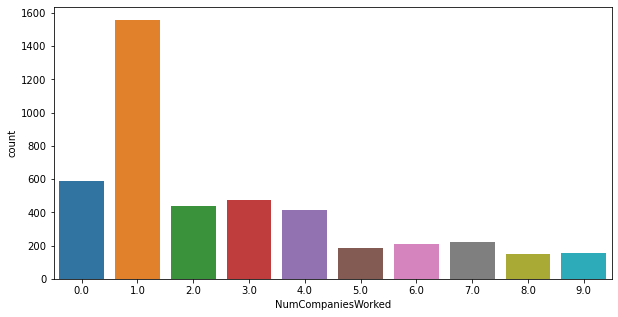

In [ ]:
## check the distribution with count plot
plt.figure(figsize=(10,5))
sb.countplot(df.NumCompaniesWorked)

In [ ]:
## we're using mode 1 is repeated more so 1 is filling

df['NumCompaniesWorked'].fillna(1.0,inplace=True)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

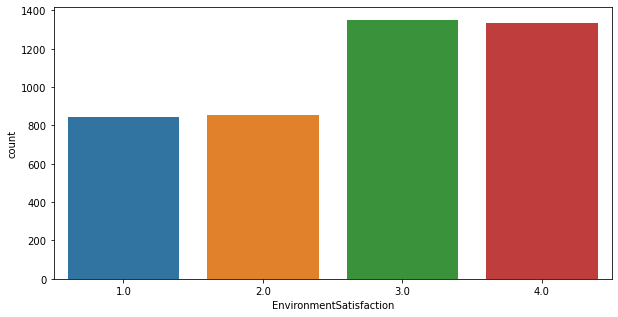

In [ ]:
## checking with EnvironmentalSatisfaction
plt.figure(figsize=(10,5))
sb.countplot(df.EnvironmentSatisfaction)

In [ ]:
df.TotalWorkingYears.fillna(10.0,inplace=True)

In [ ]:
## 3.0 is there more no. of times 
df['EnvironmentSatisfaction'].fillna(3.0,inplace=True)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

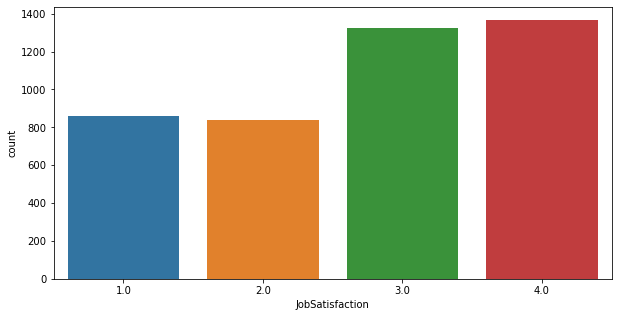

In [ ]:
## checking with JobSatisfaction
plt.figure(figsize=(10,5))
sb.countplot(df.JobSatisfaction)

In [ ]:
## 4.0 is repeated more times
df['JobSatisfaction'].fillna(4.0,inplace=True)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

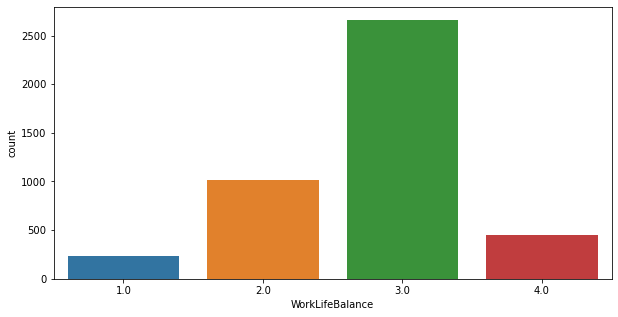

In [ ]:
## checking with WorkLifeBalance
plt.figure(figsize=(10,5))
sb.countplot(df.WorkLifeBalance)

In [ ]:
### 3.0 is there most
df['WorkLifeBalance'].fillna(3.0,inplace=True)

In [ ]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
mean_time                  0
dtype: int64

In [ ]:
len(df.columns)

27

In [ ]:
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,8.316921
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,5.897197
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,7.149526
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8,2,3,4.0,1.0,3.0,9.187612


In [ ]:
df_eda = df.copy()

In [ ]:
df_eda

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,7.877561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,4406,Female,1,Research Scientist,Single,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,8.316921
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,4407,Male,1,Laboratory Technician,Divorced,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,5.897197
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,4408,Male,2,Sales Executive,Married,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,7.149526
4408,42,No,Travel_Rarely,Sales,18,2,Medical,4409,Male,1,Laboratory Technician,Divorced,23980,0.0,14,1,10.0,2,9,7,8,2,3,4.0,1.0,3.0,9.187612


In [ ]:
def make_plot(feature_name):
    plt.figure(figsize=(18,10))
    ax = sb.countplot(x = feature_name, data=df_eda, hue='Attrition', palette='Set2')
    plt.ylabel('Employee Count')
    plt.title(f"{feature_name} vs Attrition")
    plt.legend()

In [ ]:
df_eda.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'mean_time'],
      dtype='object')

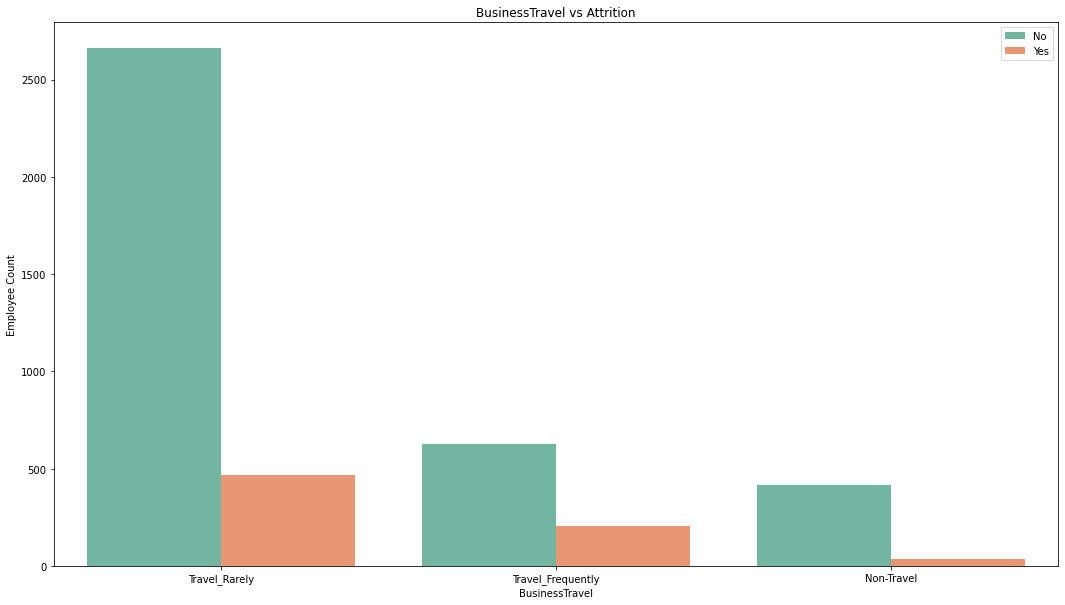

In [ ]:
make_plot('BusinessTravel')

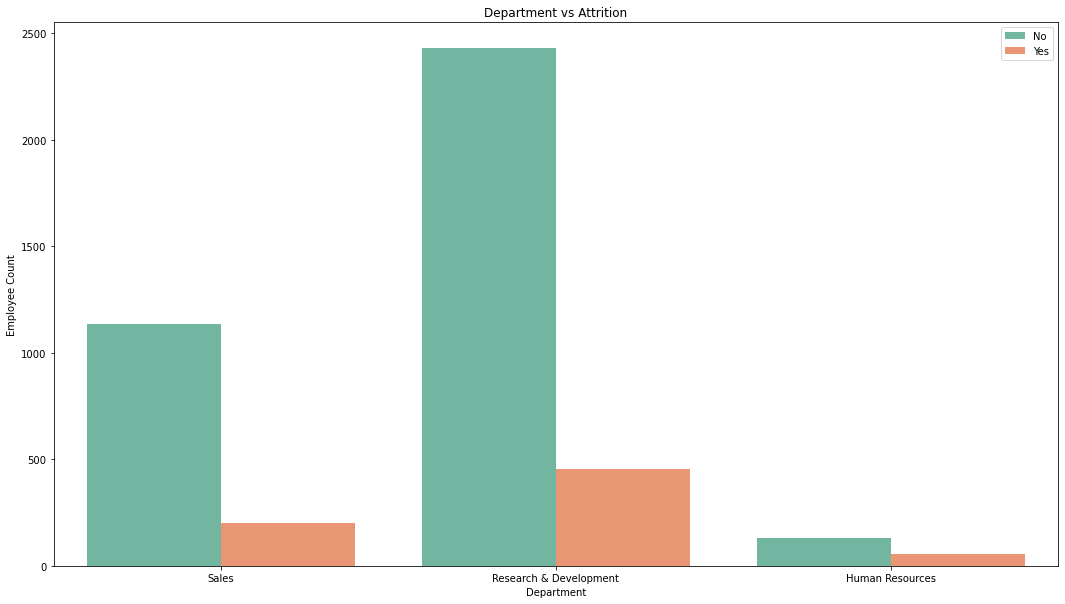

In [ ]:
make_plot('Department')

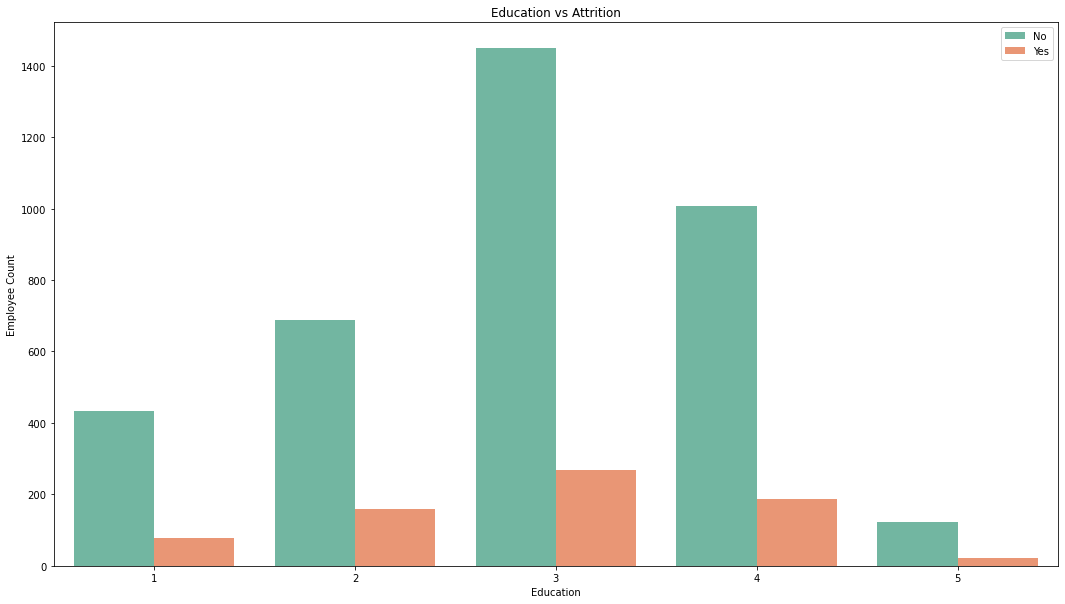

In [ ]:
make_plot('Education')

In [ ]:
data_dictionary

,Variable,Meaning,Levels
0,Age,Age of the employee,NaN
1,Attrition,Whether the employee left in the previous year...,NaN
2,BusinessTravel,How frequently the employees travelled for bus...,NaN
3,Department,Department in company,NaN
4,DistanceFromHome,Distance from home in kms,NaN
5,Education,Education Level,1 'Below College'
6,NaN,NaN,2 'College'
7,NaN,NaN,3 'Bachelor'
8,NaN,NaN,4 'Master'
9,NaN,NaN,5 'Doctor'


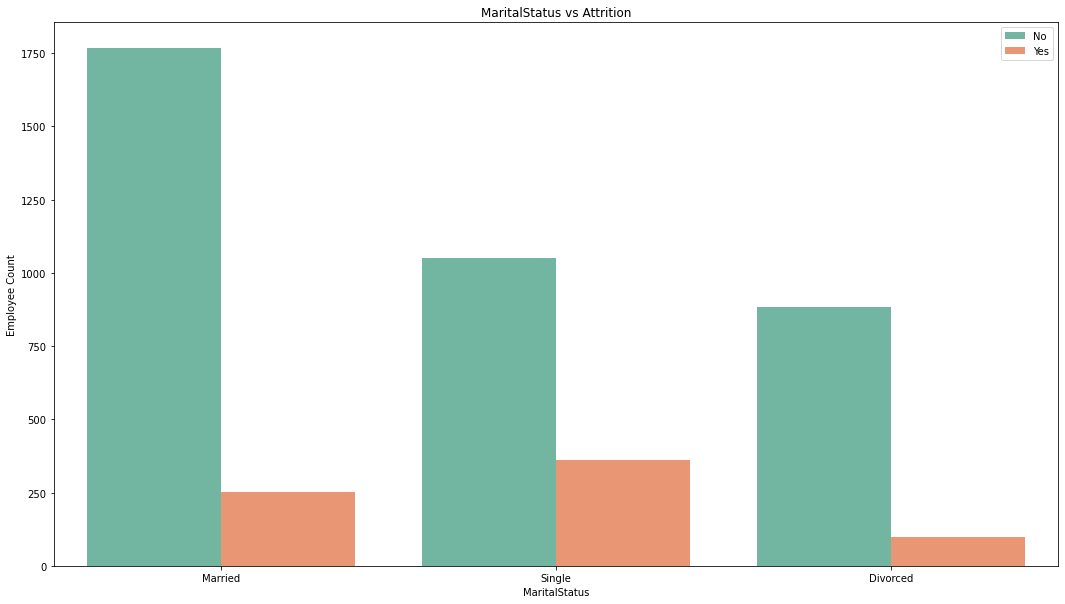

In [ ]:
make_plot('MaritalStatus')

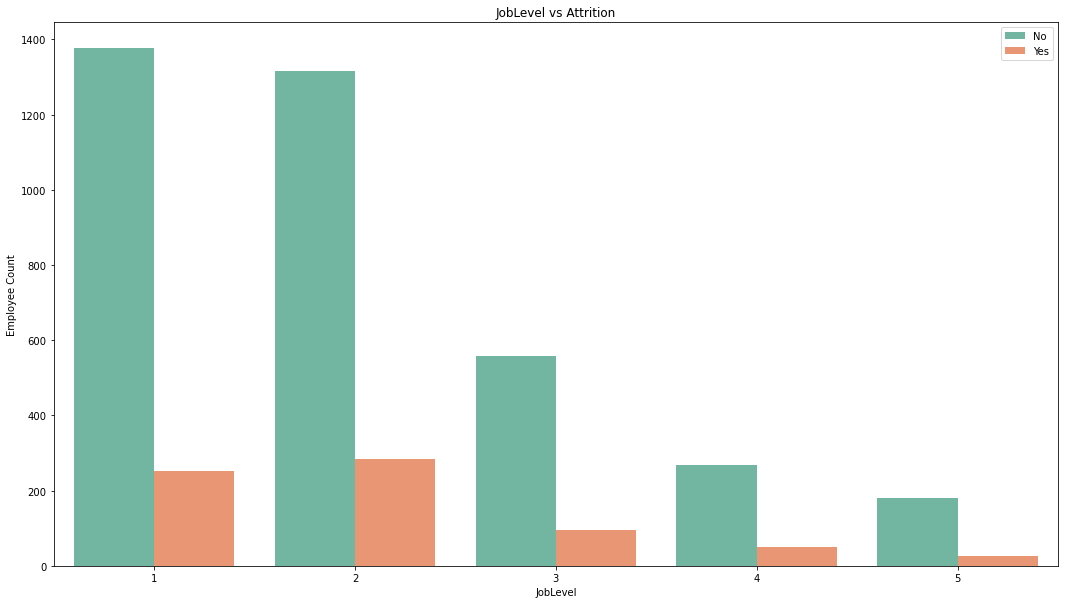

In [ ]:
make_plot('JobLevel')

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'mean_time'],
      dtype='object')

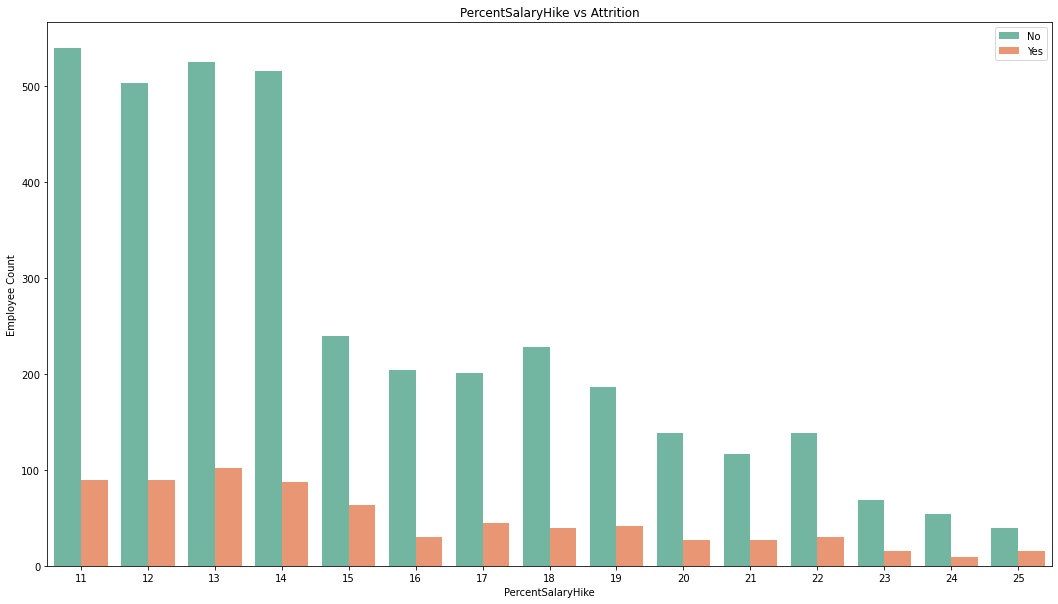

In [ ]:
make_plot('PercentSalaryHike')

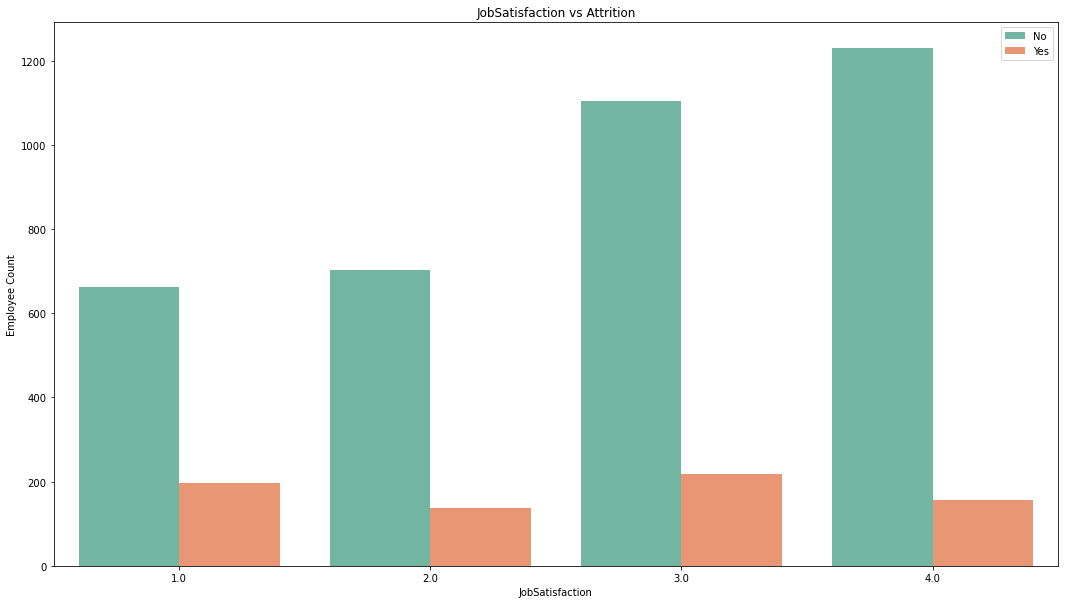

In [ ]:
make_plot('JobSatisfaction')

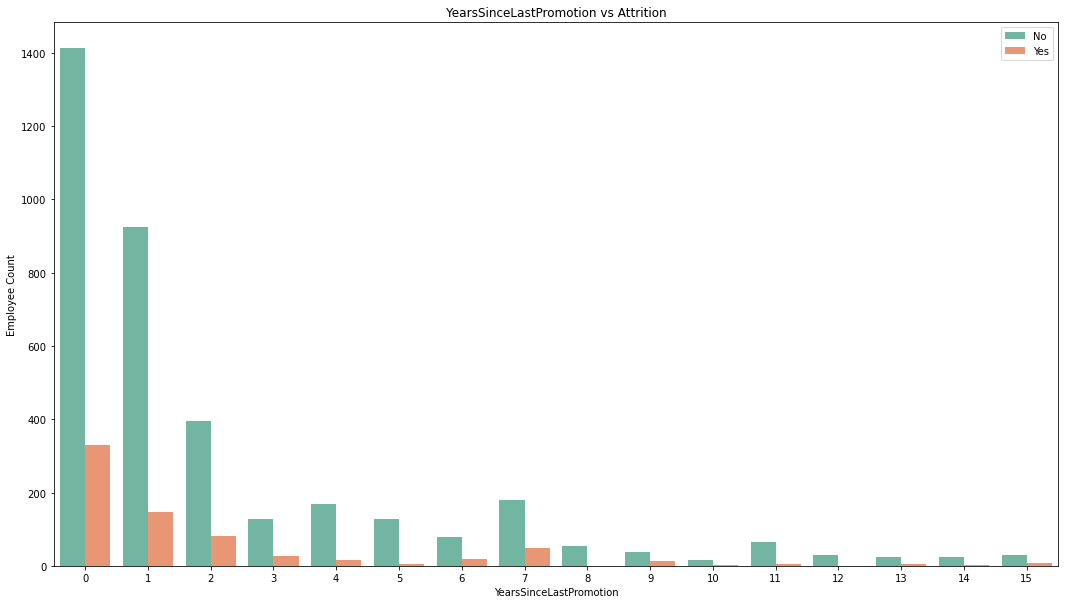

In [ ]:
make_plot('YearsSinceLastPromotion')

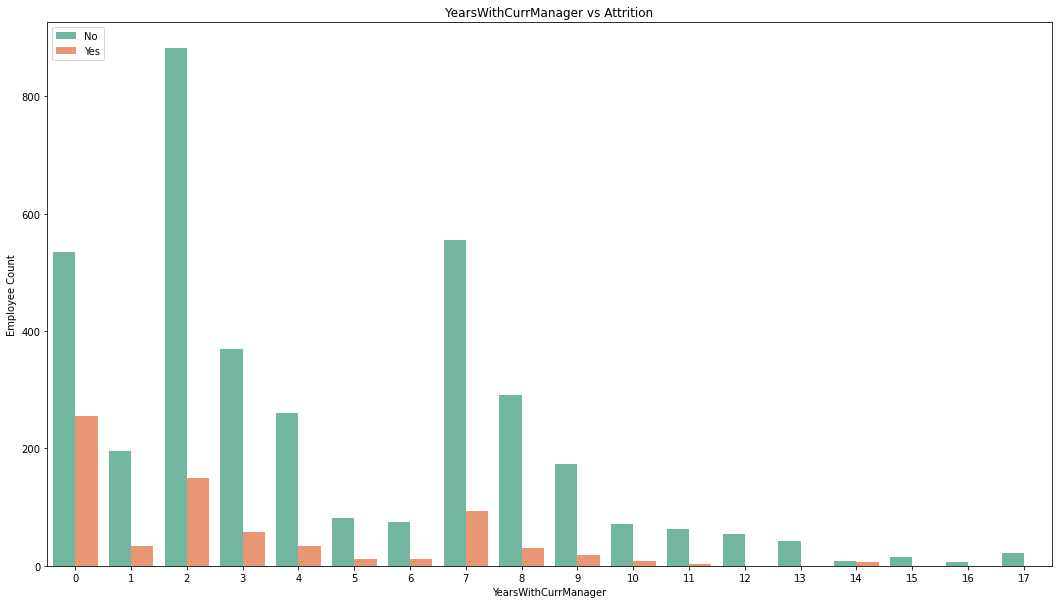

In [ ]:
make_plot('YearsWithCurrManager')

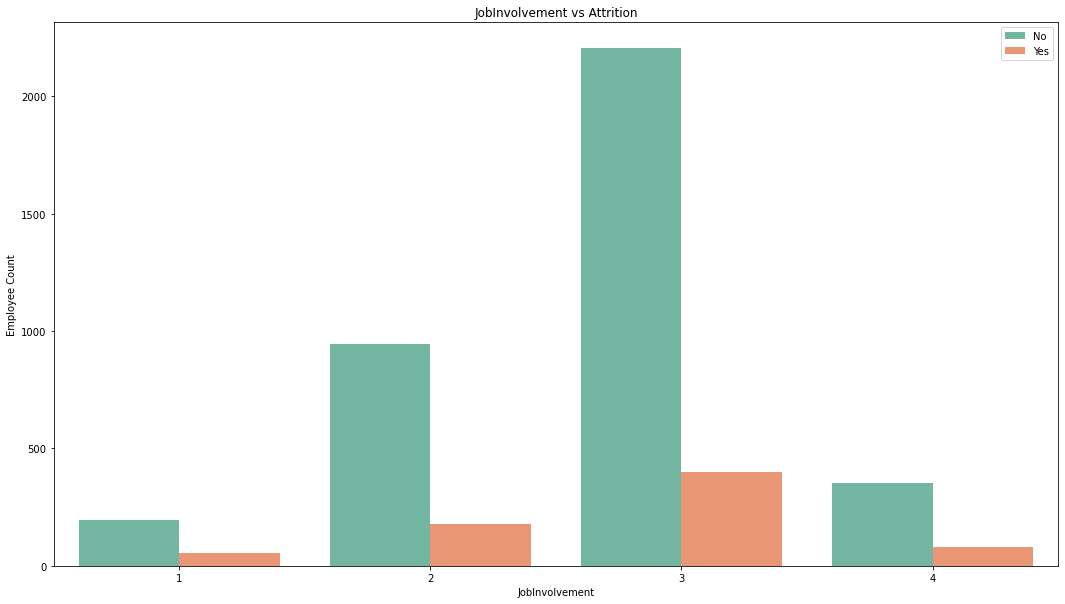

In [ ]:
make_plot('JobInvolvement')

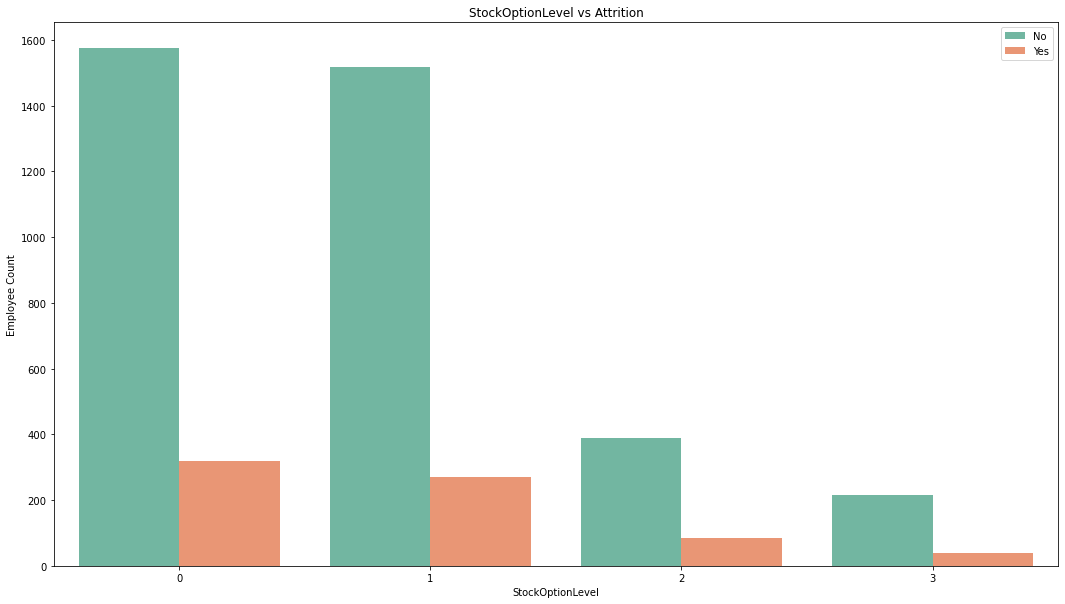

In [ ]:
make_plot('StockOptionLevel')

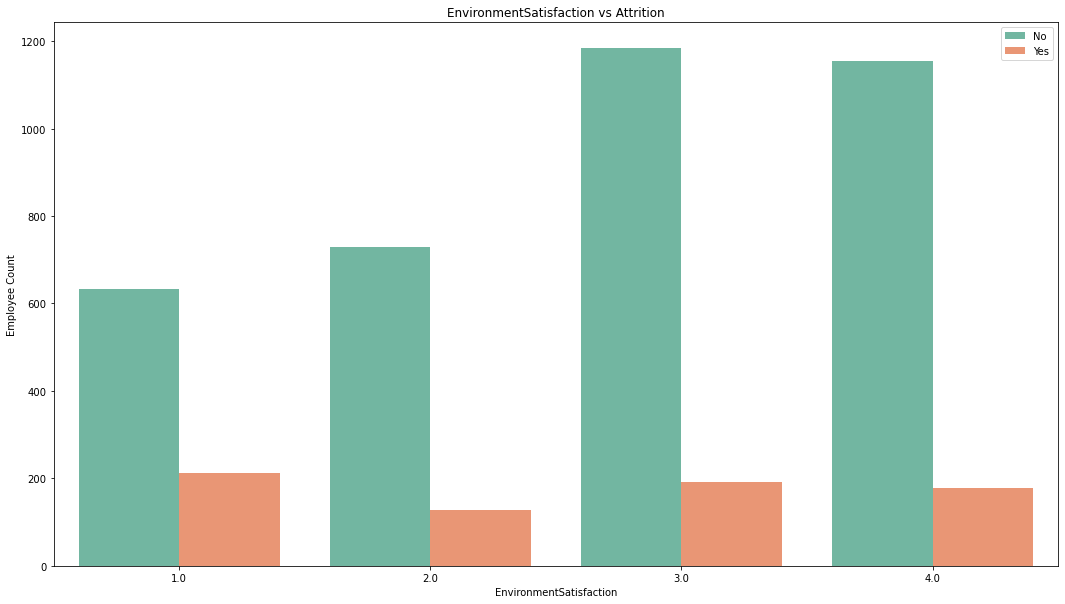

In [ ]:
make_plot('EnvironmentSatisfaction')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,7.877561


In [ ]:
one_hot_var = ['BusinessTravel', 'Department','EducationField','JobRole','MaritalStatus']
for i in one_hot_var:
    x_t = pd.get_dummies(df[i],prefix=i,prefix_sep='_',drop_first=True)
    df = df.join(x_t)
    df.drop(i,axis=1,inplace=True)

In [ ]:
df

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,No,6,2,1,Female,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,Yes,10,1,2,Female,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,No,17,4,3,Male,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,38,No,2,5,4,Male,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,6.789215,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,32,No,10,1,5,Male,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,7.877561,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,5,4,4406,Female,1,60290,3.0,17,1,10.0,5,3,0,2,3,3,4.0,1.0,3.0,8.316921,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4406,29,No,2,4,4407,Male,1,26790,2.0,15,0,10.0,2,3,0,2,2,3,4.0,4.0,3.0,5.897197,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4407,25,No,25,2,4408,Male,2,37020,0.0,20,0,5.0,4,4,1,2,3,4,1.0,3.0,3.0,7.149526,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4408,42,No,18,2,4409,Male,1,23980,0.0,14,1,10.0,2,9,7,8,2,3,4.0,1.0,3.0,9.187612,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
df.Attrition = df.Attrition.apply(lambda x: 1 if x=='Yes' else 0)
df.Gender = df.Gender.apply(lambda x: 1 if x=='Male' else 0)

In [ ]:
df.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,0,1,131160,1.0,11,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,6.870229,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,2,0,1,41890,0.0,23,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,7.315971,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,3,1,4,193280,1.0,15,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,6.816081,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,4,1,3,83210,3.0,11,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,6.789215,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,5,1,1,23420,4.0,12,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,7.877561,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [ ]:
x = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<AxesSubplot:>

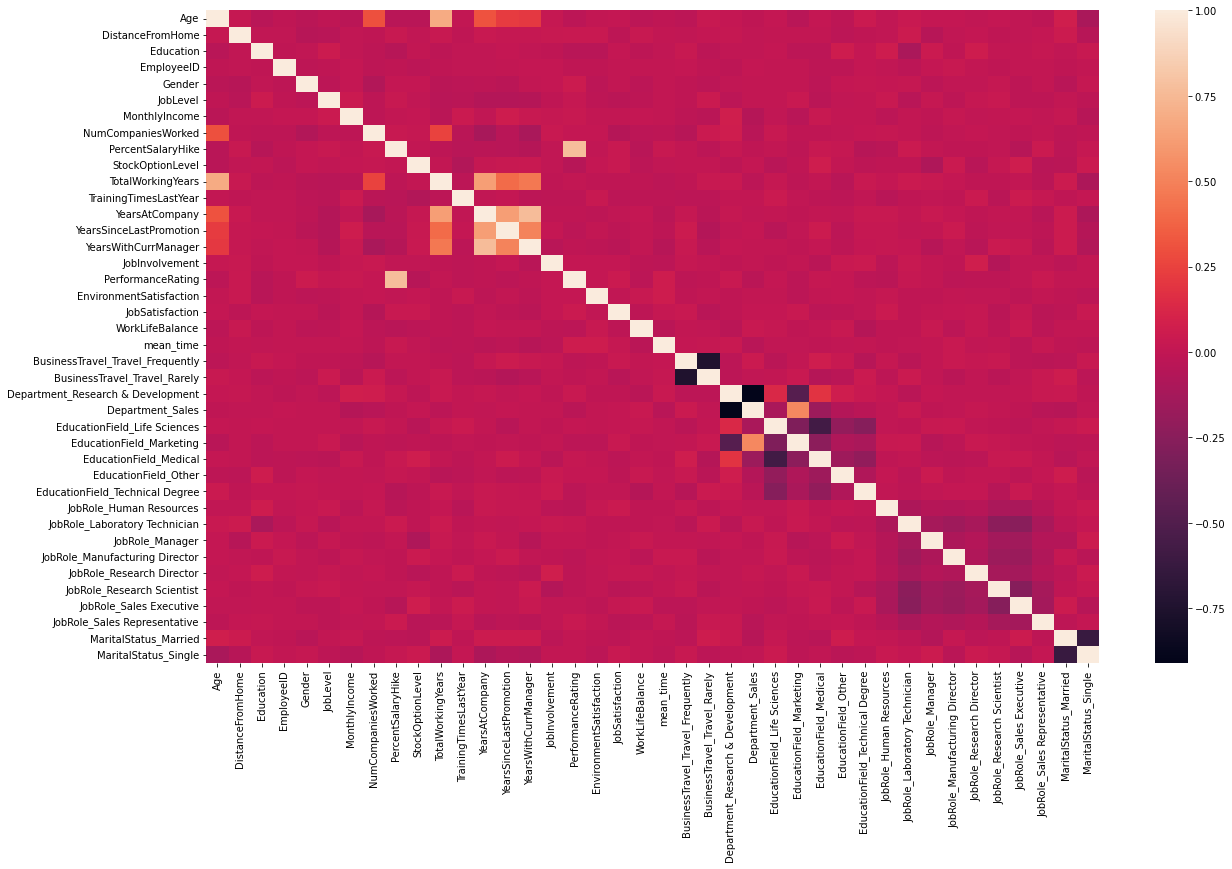

In [ ]:
plt.figure(figsize=(20,12))
sb.heatmap(x_train.corr())

In [ ]:
for Outercols in df.columns:
    for Innercols in df.columns:
        if Outercols is not(Innercols) and df[[Outercols, Innercols]].corr().iloc[0,0] >= 0.9 or df[[Outercols, Innercols]].corr().iloc[0,1] >= 0.9 or df[[Outercols, Innercols]].corr().iloc[1,0] >= 0.9 or df[[Outercols, Innercols]].corr().iloc[1,1] >= 0.9:
            print(Outercols, Innercols)
            print(df[[Outercols,Innercols]].corr())

Age Age
     Age  Age
Age  1.0  1.0
Age  1.0  1.0
Age Attrition
                Age  Attrition
Age        1.000000  -0.159205
Attrition -0.159205   1.000000
Age DistanceFromHome
                       Age  DistanceFromHome
Age               1.000000          0.006963
DistanceFromHome  0.006963          1.000000
Age Education
                Age  Education
Age        1.000000  -0.035706
Education -0.035706   1.000000
Age EmployeeID
                 Age  EmployeeID
Age         1.000000    0.008649
EmployeeID  0.008649    1.000000
Age Gender
             Age    Gender
Age     1.000000 -0.039352
Gender -0.039352  1.000000
Age JobLevel
               Age  JobLevel
Age       1.000000 -0.002884
JobLevel -0.002884  1.000000
Age MonthlyIncome
                    Age  MonthlyIncome
Age            1.000000      -0.044314
MonthlyIncome -0.044314       1.000000
Age NumCompaniesWorked
                         Age  NumCompaniesWorked
Age                 1.000000            0.299186
NumCompaniesWorked

                                  Attrition  BusinessTravel_Travel_Frequently
Attrition                          1.000000                          0.115143
BusinessTravel_Travel_Frequently   0.115143                          1.000000
Attrition BusinessTravel_Travel_Rarely
                              Attrition  BusinessTravel_Travel_Rarely
Attrition                      1.000000                     -0.049538
BusinessTravel_Travel_Rarely  -0.049538                      1.000000
Attrition Department_Research & Development
                                   Attrition  \
Attrition                           1.000000   
Department_Research & Development  -0.015307   

                                   Department_Research & Development  
Attrition                                                  -0.015307  
Department_Research & Development                           1.000000  
Attrition Department_Sales
                  Attrition  Department_Sales
Attrition          1.000000         -0.019

Education PercentSalaryHike
                   Education  PercentSalaryHike
Education           1.000000          -0.040531
PercentSalaryHike  -0.040531           1.000000
Education StockOptionLevel
                  Education  StockOptionLevel
Education          1.000000          0.001261
StockOptionLevel   0.001261          1.000000
Education TotalWorkingYears
                   Education  TotalWorkingYears
Education           1.000000          -0.010813
TotalWorkingYears  -0.010813           1.000000
Education TrainingTimesLastYear
                       Education  TrainingTimesLastYear
Education               1.000000               0.010472
TrainingTimesLastYear   0.010472               1.000000
Education YearsAtCompany
                Education  YearsAtCompany
Education         1.00000         0.00608
YearsAtCompany    0.00608         1.00000
Education YearsSinceLastPromotion
                         Education  YearsSinceLastPromotion
Education                  1.00000            

                                EmployeeID  JobRole_Manufacturing Director
EmployeeID                        1.000000                        0.013529
JobRole_Manufacturing Director    0.013529                        1.000000
EmployeeID JobRole_Research Director
                           EmployeeID  JobRole_Research Director
EmployeeID                   1.000000                  -0.002202
JobRole_Research Director   -0.002202                   1.000000
EmployeeID JobRole_Research Scientist
                            EmployeeID  JobRole_Research Scientist
EmployeeID                    1.000000                   -0.004666
JobRole_Research Scientist   -0.004666                    1.000000
EmployeeID JobRole_Sales Executive
                         EmployeeID  JobRole_Sales Executive
EmployeeID                 1.000000                 0.001284
JobRole_Sales Executive    0.001284                 1.000000
EmployeeID JobRole_Sales Representative
                              EmployeeID  JobR

JobLevel Department_Research & Development
                                   JobLevel  Department_Research & Development
JobLevel                           1.000000                          -0.036763
Department_Research & Development -0.036763                           1.000000
JobLevel Department_Sales
                  JobLevel  Department_Sales
JobLevel          1.000000          0.020701
Department_Sales  0.020701          1.000000
JobLevel EducationField_Life Sciences
                              JobLevel  EducationField_Life Sciences
JobLevel                      1.000000                      0.009053
EducationField_Life Sciences  0.009053                      1.000000
JobLevel EducationField_Marketing
                          JobLevel  EducationField_Marketing
JobLevel                  1.000000                  0.035297
EducationField_Marketing  0.035297                  1.000000
JobLevel EducationField_Medical
                        JobLevel  EducationField_Medical
JobLevel

                    NumCompaniesWorked  TotalWorkingYears
NumCompaniesWorked            1.000000           0.238606
TotalWorkingYears             0.238606           1.000000
NumCompaniesWorked TrainingTimesLastYear
                       NumCompaniesWorked  TrainingTimesLastYear
NumCompaniesWorked               1.000000              -0.032185
TrainingTimesLastYear           -0.032185               1.000000
NumCompaniesWorked YearsAtCompany
                    NumCompaniesWorked  YearsAtCompany
NumCompaniesWorked            1.000000       -0.116945
YearsAtCompany               -0.116945        1.000000
NumCompaniesWorked YearsSinceLastPromotion
                         NumCompaniesWorked  YearsSinceLastPromotion
NumCompaniesWorked                 1.000000                -0.035885
YearsSinceLastPromotion           -0.035885                 1.000000
NumCompaniesWorked YearsWithCurrManager
                      NumCompaniesWorked  YearsWithCurrManager
NumCompaniesWorked              1.0000

PercentSalaryHike JobRole_Research Director
                           PercentSalaryHike  JobRole_Research Director
PercentSalaryHike                    1.00000                   -0.00964
JobRole_Research Director           -0.00964                    1.00000
PercentSalaryHike JobRole_Research Scientist
                            PercentSalaryHike  JobRole_Research Scientist
PercentSalaryHike                    1.000000                   -0.009871
JobRole_Research Scientist          -0.009871                    1.000000
PercentSalaryHike JobRole_Sales Executive
                         PercentSalaryHike  JobRole_Sales Executive
PercentSalaryHike                  1.00000                 -0.04176
JobRole_Sales Executive           -0.04176                  1.00000
PercentSalaryHike JobRole_Sales Representative
                              PercentSalaryHike  JobRole_Sales Representative
PercentSalaryHike                      1.000000                      0.066547
JobRole_Sales Representa

                         TotalWorkingYears  EnvironmentSatisfaction
TotalWorkingYears                 1.000000                -0.002433
EnvironmentSatisfaction          -0.002433                 1.000000
TotalWorkingYears JobSatisfaction
                   TotalWorkingYears  JobSatisfaction
TotalWorkingYears           1.000000        -0.016034
JobSatisfaction            -0.016034         1.000000
TotalWorkingYears WorkLifeBalance
                   TotalWorkingYears  WorkLifeBalance
TotalWorkingYears           1.000000         0.001254
WorkLifeBalance             0.001254         1.000000
TotalWorkingYears mean_time
                   TotalWorkingYears  mean_time
TotalWorkingYears           1.000000  -0.012385
mean_time                  -0.012385   1.000000
TotalWorkingYears BusinessTravel_Travel_Frequently
                                  TotalWorkingYears  \
TotalWorkingYears                          1.000000   
BusinessTravel_Travel_Frequently          -0.011745   

               

                YearsAtCompany  Education
YearsAtCompany         1.00000    0.00608
Education              0.00608    1.00000
YearsAtCompany EmployeeID
                YearsAtCompany  EmployeeID
YearsAtCompany        1.000000    0.004086
EmployeeID            0.004086    1.000000
YearsAtCompany Gender
                YearsAtCompany    Gender
YearsAtCompany        1.000000 -0.017277
Gender               -0.017277  1.000000
YearsAtCompany JobLevel
                YearsAtCompany  JobLevel
YearsAtCompany        1.000000 -0.064219
JobLevel             -0.064219  1.000000
YearsAtCompany MonthlyIncome
                YearsAtCompany  MonthlyIncome
YearsAtCompany        1.000000       0.000995
MonthlyIncome         0.000995       1.000000
YearsAtCompany NumCompaniesWorked
                    YearsAtCompany  NumCompaniesWorked
YearsAtCompany            1.000000           -0.116945
NumCompaniesWorked       -0.116945            1.000000
YearsAtCompany PercentSalaryHike
                   YearsAtCo

YearsSinceLastPromotion EducationField_Medical
                         YearsSinceLastPromotion  EducationField_Medical
YearsSinceLastPromotion                 1.000000                0.040385
EducationField_Medical                  0.040385                1.000000
YearsSinceLastPromotion EducationField_Other
                         YearsSinceLastPromotion  EducationField_Other
YearsSinceLastPromotion                 1.000000             -0.012326
EducationField_Other                   -0.012326              1.000000
YearsSinceLastPromotion EducationField_Technical Degree
                                 YearsSinceLastPromotion  \
YearsSinceLastPromotion                         1.000000   
EducationField_Technical Degree                 0.028229   

                                 EducationField_Technical Degree  
YearsSinceLastPromotion                                 0.028229  
EducationField_Technical Degree                         1.000000  
YearsSinceLastPromotion JobRole_Human 

                JobInvolvement  MonthlyIncome
JobInvolvement        1.000000       0.023346
MonthlyIncome         0.023346       1.000000
JobInvolvement NumCompaniesWorked
                    JobInvolvement  NumCompaniesWorked
JobInvolvement            1.000000            0.028082
NumCompaniesWorked        0.028082            1.000000
JobInvolvement PercentSalaryHike
                   JobInvolvement  PercentSalaryHike
JobInvolvement           1.000000          -0.004658
PercentSalaryHike       -0.004658           1.000000
JobInvolvement StockOptionLevel
                  JobInvolvement  StockOptionLevel
JobInvolvement          1.000000          0.010295
StockOptionLevel        0.010295          1.000000
JobInvolvement TotalWorkingYears
                   JobInvolvement  TotalWorkingYears
JobInvolvement           1.000000           0.006778
TotalWorkingYears        0.006778           1.000000
JobInvolvement TrainingTimesLastYear
                       JobInvolvement  TrainingTimesLastY

                          PerformanceRating  EducationField_Marketing
PerformanceRating                  1.000000                 -0.020918
EducationField_Marketing          -0.020918                  1.000000
PerformanceRating EducationField_Medical
                        PerformanceRating  EducationField_Medical
PerformanceRating                1.000000                0.014868
EducationField_Medical           0.014868                1.000000
PerformanceRating EducationField_Other
                      PerformanceRating  EducationField_Other
PerformanceRating              1.000000              0.011449
EducationField_Other           0.011449              1.000000
PerformanceRating EducationField_Technical Degree
                                 PerformanceRating  \
PerformanceRating                         1.000000   
EducationField_Technical Degree          -0.021729   

                                 EducationField_Technical Degree  
PerformanceRating                             

                 JobSatisfaction  Attrition
JobSatisfaction         1.000000  -0.104017
Attrition              -0.104017   1.000000
JobSatisfaction DistanceFromHome
                  JobSatisfaction  DistanceFromHome
JobSatisfaction          1.000000         -0.011532
DistanceFromHome        -0.011532          1.000000
JobSatisfaction Education
                 JobSatisfaction  Education
JobSatisfaction         1.000000  -0.006259
Education              -0.006259   1.000000
JobSatisfaction EmployeeID
                 JobSatisfaction  EmployeeID
JobSatisfaction         1.000000   -0.000924
EmployeeID             -0.000924    1.000000
JobSatisfaction Gender
                 JobSatisfaction    Gender
JobSatisfaction         1.000000  0.016298
Gender                  0.016298  1.000000
JobSatisfaction JobLevel
                 JobSatisfaction  JobLevel
JobSatisfaction         1.000000 -0.019896
JobLevel               -0.019896  1.000000
JobSatisfaction MonthlyIncome
                 JobSat

                                  WorkLifeBalance  \
WorkLifeBalance                          1.000000   
BusinessTravel_Travel_Frequently         0.011159   

                                  BusinessTravel_Travel_Frequently  
WorkLifeBalance                                           0.011159  
BusinessTravel_Travel_Frequently                          1.000000  
WorkLifeBalance BusinessTravel_Travel_Rarely
                              WorkLifeBalance  BusinessTravel_Travel_Rarely
WorkLifeBalance                      1.000000                     -0.013467
BusinessTravel_Travel_Rarely        -0.013467                      1.000000
WorkLifeBalance Department_Research & Development
                                   WorkLifeBalance  \
WorkLifeBalance                           1.000000   
Department_Research & Development        -0.015683   

                                   Department_Research & Development  
WorkLifeBalance                                            -0.015683  
Depar

BusinessTravel_Travel_Frequently PercentSalaryHike
                                  BusinessTravel_Travel_Frequently  \
BusinessTravel_Travel_Frequently                          1.000000   
PercentSalaryHike                                        -0.005724   

                                  PercentSalaryHike  
BusinessTravel_Travel_Frequently          -0.005724  
PercentSalaryHike                          1.000000  
BusinessTravel_Travel_Frequently StockOptionLevel
                                  BusinessTravel_Travel_Frequently  \
BusinessTravel_Travel_Frequently                          1.000000   
StockOptionLevel                                          0.002238   

                                  StockOptionLevel  
BusinessTravel_Travel_Frequently          0.002238  
StockOptionLevel                          1.000000  
BusinessTravel_Travel_Frequently TotalWorkingYears
                                  BusinessTravel_Travel_Frequently  \
BusinessTravel_Travel_Frequently   

BusinessTravel_Travel_Rarely JobRole_Laboratory Technician
                               BusinessTravel_Travel_Rarely  \
BusinessTravel_Travel_Rarely                       1.000000   
JobRole_Laboratory Technician                      0.040249   

                               JobRole_Laboratory Technician  
BusinessTravel_Travel_Rarely                        0.040249  
JobRole_Laboratory Technician                       1.000000  
BusinessTravel_Travel_Rarely JobRole_Manager
                              BusinessTravel_Travel_Rarely  JobRole_Manager
BusinessTravel_Travel_Rarely                        1.0000           0.0155
JobRole_Manager                                     0.0155           1.0000
BusinessTravel_Travel_Rarely JobRole_Manufacturing Director
                                BusinessTravel_Travel_Rarely  \
BusinessTravel_Travel_Rarely                        1.000000   
JobRole_Manufacturing Director                     -0.024529   

                                JobR

Department_Sales JobSatisfaction
                  Department_Sales  JobSatisfaction
Department_Sales           1.00000          0.02815
JobSatisfaction            0.02815          1.00000
Department_Sales WorkLifeBalance
                  Department_Sales  WorkLifeBalance
Department_Sales          1.000000         0.020648
WorkLifeBalance           0.020648         1.000000
Department_Sales mean_time
                  Department_Sales  mean_time
Department_Sales          1.000000  -0.033274
mean_time                -0.033274   1.000000
Department_Sales BusinessTravel_Travel_Frequently
                                  Department_Sales  \
Department_Sales                          1.000000   
BusinessTravel_Travel_Frequently          0.045247   

                                  BusinessTravel_Travel_Frequently  
Department_Sales                                          0.045247  
BusinessTravel_Travel_Frequently                          1.000000  
Department_Sales BusinessTravel_Trave

EducationField_Life Sciences MaritalStatus_Single
                              EducationField_Life Sciences  \
EducationField_Life Sciences                      1.000000   
MaritalStatus_Single                              0.039249   

                              MaritalStatus_Single  
EducationField_Life Sciences              0.039249  
MaritalStatus_Single                      1.000000  
EducationField_Marketing Age
                          EducationField_Marketing       Age
EducationField_Marketing                  1.000000 -0.032831
Age                                      -0.032831  1.000000
EducationField_Marketing Attrition
                          EducationField_Marketing  Attrition
EducationField_Marketing                   1.00000   -0.00378
Attrition                                 -0.00378    1.00000
EducationField_Marketing DistanceFromHome
                          EducationField_Marketing  DistanceFromHome
EducationField_Marketing                   1.00000          

EducationField_Medical TotalWorkingYears
                        EducationField_Medical  TotalWorkingYears
EducationField_Medical                1.000000           0.007592
TotalWorkingYears                     0.007592           1.000000
EducationField_Medical TrainingTimesLastYear
                        EducationField_Medical  TrainingTimesLastYear
EducationField_Medical                 1.00000               -0.01009
TrainingTimesLastYear                 -0.01009                1.00000
EducationField_Medical YearsAtCompany
                        EducationField_Medical  YearsAtCompany
EducationField_Medical                1.000000       -0.002817
YearsAtCompany                       -0.002817        1.000000
EducationField_Medical YearsSinceLastPromotion
                         EducationField_Medical  YearsSinceLastPromotion
EducationField_Medical                 1.000000                 0.040385
YearsSinceLastPromotion                0.040385                 1.000000
EducationFiel

                               EducationField_Other  \
EducationField_Other                       1.000000   
JobRole_Laboratory Technician             -0.019043   

                               JobRole_Laboratory Technician  
EducationField_Other                               -0.019043  
JobRole_Laboratory Technician                       1.000000  
EducationField_Other JobRole_Manager
                      EducationField_Other  JobRole_Manager
EducationField_Other              1.000000         0.015283
JobRole_Manager                   0.015283         1.000000
EducationField_Other JobRole_Manufacturing Director
                                EducationField_Other  \
EducationField_Other                        1.000000   
JobRole_Manufacturing Director             -0.000879   

                                JobRole_Manufacturing Director  
EducationField_Other                                 -0.000879  
JobRole_Manufacturing Director                        1.000000  
EducationFie

JobRole_Human Resources BusinessTravel_Travel_Frequently
                                  JobRole_Human Resources  \
JobRole_Human Resources                          1.000000   
BusinessTravel_Travel_Frequently                 0.011313   

                                  BusinessTravel_Travel_Frequently  
JobRole_Human Resources                                   0.011313  
BusinessTravel_Travel_Frequently                          1.000000  
JobRole_Human Resources BusinessTravel_Travel_Rarely
                              JobRole_Human Resources  \
JobRole_Human Resources                      1.000000   
BusinessTravel_Travel_Rarely                -0.015374   

                              BusinessTravel_Travel_Rarely  
JobRole_Human Resources                          -0.015374  
BusinessTravel_Travel_Rarely                      1.000000  
JobRole_Human Resources Department_Research & Development
                                   JobRole_Human Resources  \
JobRole_Human Resources 

                 JobRole_Manager  MonthlyIncome
JobRole_Manager         1.000000      -0.009477
MonthlyIncome          -0.009477       1.000000
JobRole_Manager NumCompaniesWorked
                    JobRole_Manager  NumCompaniesWorked
JobRole_Manager            1.000000           -0.005501
NumCompaniesWorked        -0.005501            1.000000
JobRole_Manager PercentSalaryHike
                   JobRole_Manager  PercentSalaryHike
JobRole_Manager           1.000000          -0.003199
PercentSalaryHike        -0.003199           1.000000
JobRole_Manager StockOptionLevel
                  JobRole_Manager  StockOptionLevel
JobRole_Manager          1.000000         -0.081638
StockOptionLevel        -0.081638          1.000000
JobRole_Manager TotalWorkingYears
                   JobRole_Manager  TotalWorkingYears
JobRole_Manager           1.000000           0.021597
TotalWorkingYears         0.021597           1.000000
JobRole_Manager TrainingTimesLastYear
                       JobRole_Man

JobRole_Manufacturing Director Department_Sales
                                JobRole_Manufacturing Director  \
JobRole_Manufacturing Director                        1.000000   
Department_Sales                                     -0.009891   

                                Department_Sales  
JobRole_Manufacturing Director         -0.009891  
Department_Sales                        1.000000  
JobRole_Manufacturing Director EducationField_Life Sciences
                                JobRole_Manufacturing Director  \
JobRole_Manufacturing Director                        1.000000   
EducationField_Life Sciences                          0.024215   

                                EducationField_Life Sciences  
JobRole_Manufacturing Director                      0.024215  
EducationField_Life Sciences                        1.000000  
JobRole_Manufacturing Director EducationField_Marketing
                                JobRole_Manufacturing Director  \
JobRole_Manufacturing Director

                            JobRole_Research Scientist  YearsWithCurrManager
JobRole_Research Scientist                    1.000000              0.039219
YearsWithCurrManager                          0.039219              1.000000
JobRole_Research Scientist JobInvolvement
                            JobRole_Research Scientist  JobInvolvement
JobRole_Research Scientist                    1.000000       -0.055467
JobInvolvement                               -0.055467        1.000000
JobRole_Research Scientist PerformanceRating
                            JobRole_Research Scientist  PerformanceRating
JobRole_Research Scientist                      1.0000            -0.0184
PerformanceRating                              -0.0184             1.0000
JobRole_Research Scientist EnvironmentSatisfaction
                            JobRole_Research Scientist  \
JobRole_Research Scientist                    1.000000   
EnvironmentSatisfaction                      -0.007953   

                     

JobRole_Sales Executive JobRole_Human Resources
                         JobRole_Sales Executive  JobRole_Human Resources
JobRole_Sales Executive                 1.000000                -0.102226
JobRole_Human Resources                -0.102226                 1.000000
JobRole_Sales Executive JobRole_Laboratory Technician
                               JobRole_Sales Executive  \
JobRole_Sales Executive                       1.000000   
JobRole_Laboratory Technician                -0.246873   

                               JobRole_Laboratory Technician  
JobRole_Sales Executive                            -0.246873  
JobRole_Laboratory Technician                       1.000000  
JobRole_Sales Executive JobRole_Manager
                         JobRole_Sales Executive  JobRole_Manager
JobRole_Sales Executive                 1.000000        -0.145765
JobRole_Manager                        -0.145765         1.000000
JobRole_Sales Executive JobRole_Manufacturing Director
                   

                       MaritalStatus_Married  YearsWithCurrManager
MaritalStatus_Married               1.000000              0.032972
YearsWithCurrManager                0.032972              1.000000
MaritalStatus_Married JobInvolvement
                       MaritalStatus_Married  JobInvolvement
MaritalStatus_Married               1.000000       -0.017745
JobInvolvement                     -0.017745        1.000000
MaritalStatus_Married PerformanceRating
                       MaritalStatus_Married  PerformanceRating
MaritalStatus_Married               1.000000           0.005799
PerformanceRating                   0.005799           1.000000
MaritalStatus_Married EnvironmentSatisfaction
                         MaritalStatus_Married  EnvironmentSatisfaction
MaritalStatus_Married                 1.000000                -0.024274
EnvironmentSatisfaction              -0.024274                 1.000000
MaritalStatus_Married JobSatisfaction
                       MaritalStatus_Married  J

In [ ]:
df[['PerformanceRating', 'PercentSalaryHike']].corr().iloc[1,0] >= 0.9 or df[['PerformanceRating', 'PercentSalaryHike']].corr().iloc[1,1] >= 0.9

True

In [ ]:
df[['PerformanceRating', 'PercentSalaryHike']].corr()

,PerformanceRating,PercentSalaryHike
PerformanceRating,1.00000,0.77355
PercentSalaryHike,0.77355,1.00000


In [ ]:
for outerCols in df.columns:
    for innerCols in df.columns:
        if outerCols == Innercols:
            pass
        else:
            if df[[outerCols, innerCols]].corr().iloc[1,0] >= 0.9 or df[[outerCols, innerCols]].corr().iloc[1,1] >= 0.9 or df[[outerCols, innerCols]].corr().iloc[0,0] >= 0.9 or df[[outerCols, innerCols]].corr().iloc[0,1] >= 0.9:
                print(innerCols, outerCols)

Age Age
Attrition Age
DistanceFromHome Age
Education Age
EmployeeID Age
Gender Age
JobLevel Age
MonthlyIncome Age
NumCompaniesWorked Age
PercentSalaryHike Age
StockOptionLevel Age
TotalWorkingYears Age
TrainingTimesLastYear Age
YearsAtCompany Age
YearsSinceLastPromotion Age
YearsWithCurrManager Age
JobInvolvement Age
PerformanceRating Age
EnvironmentSatisfaction Age
JobSatisfaction Age
WorkLifeBalance Age
mean_time Age
BusinessTravel_Travel_Frequently Age
BusinessTravel_Travel_Rarely Age
Department_Research & Development Age
Department_Sales Age
EducationField_Life Sciences Age
EducationField_Marketing Age
EducationField_Medical Age
EducationField_Other Age
EducationField_Technical Degree Age
JobRole_Human Resources Age
JobRole_Laboratory Technician Age
JobRole_Manager Age
JobRole_Manufacturing Director Age
JobRole_Research Director Age
JobRole_Research Scientist Age
JobRole_Sales Executive Age
JobRole_Sales Representative Age
MaritalStatus_Married Age
MaritalStatus_Single Age
Age Attr

EducationField_Medical MonthlyIncome
EducationField_Other MonthlyIncome
EducationField_Technical Degree MonthlyIncome
JobRole_Human Resources MonthlyIncome
JobRole_Laboratory Technician MonthlyIncome
JobRole_Manager MonthlyIncome
JobRole_Manufacturing Director MonthlyIncome
JobRole_Research Director MonthlyIncome
JobRole_Research Scientist MonthlyIncome
JobRole_Sales Executive MonthlyIncome
JobRole_Sales Representative MonthlyIncome
MaritalStatus_Married MonthlyIncome
MaritalStatus_Single MonthlyIncome
Age NumCompaniesWorked
Attrition NumCompaniesWorked
DistanceFromHome NumCompaniesWorked
Education NumCompaniesWorked
EmployeeID NumCompaniesWorked
Gender NumCompaniesWorked
JobLevel NumCompaniesWorked
MonthlyIncome NumCompaniesWorked
NumCompaniesWorked NumCompaniesWorked
PercentSalaryHike NumCompaniesWorked
StockOptionLevel NumCompaniesWorked
TotalWorkingYears NumCompaniesWorked
TrainingTimesLastYear NumCompaniesWorked
YearsAtCompany NumCompaniesWorked
YearsSinceLastPromotion NumCompanie

PerformanceRating YearsAtCompany
EnvironmentSatisfaction YearsAtCompany
JobSatisfaction YearsAtCompany
WorkLifeBalance YearsAtCompany
mean_time YearsAtCompany
BusinessTravel_Travel_Frequently YearsAtCompany
BusinessTravel_Travel_Rarely YearsAtCompany
Department_Research & Development YearsAtCompany
Department_Sales YearsAtCompany
EducationField_Life Sciences YearsAtCompany
EducationField_Marketing YearsAtCompany
EducationField_Medical YearsAtCompany
EducationField_Other YearsAtCompany
EducationField_Technical Degree YearsAtCompany
JobRole_Human Resources YearsAtCompany
JobRole_Laboratory Technician YearsAtCompany
JobRole_Manager YearsAtCompany
JobRole_Manufacturing Director YearsAtCompany
JobRole_Research Director YearsAtCompany
JobRole_Research Scientist YearsAtCompany
JobRole_Sales Executive YearsAtCompany
JobRole_Sales Representative YearsAtCompany
MaritalStatus_Married YearsAtCompany
MaritalStatus_Single YearsAtCompany
Age YearsSinceLastPromotion
Attrition YearsSinceLastPromotion
D

JobRole_Research Scientist EnvironmentSatisfaction
JobRole_Sales Executive EnvironmentSatisfaction
JobRole_Sales Representative EnvironmentSatisfaction
MaritalStatus_Married EnvironmentSatisfaction
MaritalStatus_Single EnvironmentSatisfaction
Age JobSatisfaction
Attrition JobSatisfaction
DistanceFromHome JobSatisfaction
Education JobSatisfaction
EmployeeID JobSatisfaction
Gender JobSatisfaction
JobLevel JobSatisfaction
MonthlyIncome JobSatisfaction
NumCompaniesWorked JobSatisfaction
PercentSalaryHike JobSatisfaction
StockOptionLevel JobSatisfaction
TotalWorkingYears JobSatisfaction
TrainingTimesLastYear JobSatisfaction
YearsAtCompany JobSatisfaction
YearsSinceLastPromotion JobSatisfaction
YearsWithCurrManager JobSatisfaction
JobInvolvement JobSatisfaction
PerformanceRating JobSatisfaction
EnvironmentSatisfaction JobSatisfaction
JobSatisfaction JobSatisfaction
WorkLifeBalance JobSatisfaction
mean_time JobSatisfaction
BusinessTravel_Travel_Frequently JobSatisfaction
BusinessTravel_Travel

BusinessTravel_Travel_Frequently Department_Research & Development
BusinessTravel_Travel_Rarely Department_Research & Development
Department_Research & Development Department_Research & Development
Department_Sales Department_Research & Development
EducationField_Life Sciences Department_Research & Development
EducationField_Marketing Department_Research & Development
EducationField_Medical Department_Research & Development
EducationField_Other Department_Research & Development
EducationField_Technical Degree Department_Research & Development
JobRole_Human Resources Department_Research & Development
JobRole_Laboratory Technician Department_Research & Development
JobRole_Manager Department_Research & Development
JobRole_Manufacturing Director Department_Research & Development
JobRole_Research Director Department_Research & Development
JobRole_Research Scientist Department_Research & Development
JobRole_Sales Executive Department_Research & Development
JobRole_Sales Representative Depart

DistanceFromHome EducationField_Other
Education EducationField_Other
EmployeeID EducationField_Other
Gender EducationField_Other
JobLevel EducationField_Other
MonthlyIncome EducationField_Other
NumCompaniesWorked EducationField_Other
PercentSalaryHike EducationField_Other
StockOptionLevel EducationField_Other
TotalWorkingYears EducationField_Other
TrainingTimesLastYear EducationField_Other
YearsAtCompany EducationField_Other
YearsSinceLastPromotion EducationField_Other
YearsWithCurrManager EducationField_Other
JobInvolvement EducationField_Other
PerformanceRating EducationField_Other
EnvironmentSatisfaction EducationField_Other
JobSatisfaction EducationField_Other
WorkLifeBalance EducationField_Other
mean_time EducationField_Other
BusinessTravel_Travel_Frequently EducationField_Other
BusinessTravel_Travel_Rarely EducationField_Other
Department_Research & Development EducationField_Other
Department_Sales EducationField_Other
EducationField_Life Sciences EducationField_Other
EducationFie

EducationField_Marketing JobRole_Manager
EducationField_Medical JobRole_Manager
EducationField_Other JobRole_Manager
EducationField_Technical Degree JobRole_Manager
JobRole_Human Resources JobRole_Manager
JobRole_Laboratory Technician JobRole_Manager
JobRole_Manager JobRole_Manager
JobRole_Manufacturing Director JobRole_Manager
JobRole_Research Director JobRole_Manager
JobRole_Research Scientist JobRole_Manager
JobRole_Sales Executive JobRole_Manager
JobRole_Sales Representative JobRole_Manager
MaritalStatus_Married JobRole_Manager
MaritalStatus_Single JobRole_Manager
Age JobRole_Manufacturing Director
Attrition JobRole_Manufacturing Director
DistanceFromHome JobRole_Manufacturing Director
Education JobRole_Manufacturing Director
EmployeeID JobRole_Manufacturing Director
Gender JobRole_Manufacturing Director
JobLevel JobRole_Manufacturing Director
MonthlyIncome JobRole_Manufacturing Director
NumCompaniesWorked JobRole_Manufacturing Director
PercentSalaryHike JobRole_Manufacturing Direc

PerformanceRating MaritalStatus_Married
EnvironmentSatisfaction MaritalStatus_Married
JobSatisfaction MaritalStatus_Married
WorkLifeBalance MaritalStatus_Married
mean_time MaritalStatus_Married
BusinessTravel_Travel_Frequently MaritalStatus_Married
BusinessTravel_Travel_Rarely MaritalStatus_Married
Department_Research & Development MaritalStatus_Married
Department_Sales MaritalStatus_Married
EducationField_Life Sciences MaritalStatus_Married
EducationField_Marketing MaritalStatus_Married
EducationField_Medical MaritalStatus_Married
EducationField_Other MaritalStatus_Married
EducationField_Technical Degree MaritalStatus_Married
JobRole_Human Resources MaritalStatus_Married
JobRole_Laboratory Technician MaritalStatus_Married
JobRole_Manager MaritalStatus_Married
JobRole_Manufacturing Director MaritalStatus_Married
JobRole_Research Director MaritalStatus_Married
JobRole_Research Scientist MaritalStatus_Married
JobRole_Sales Executive MaritalStatus_Married
JobRole_Sales Representative Mari

In [ ]:
df[['Education','Age']].corr()

,Education,Age
Education,1.000000,-0.035706
Age,-0.035706,1.000000


In [ ]:
x_corr = x_train.corr()

In [ ]:
for i in range(x_corr.shape[0]):
    for j in range(x_corr.shape[1]):
        if (abs(x_corr.iloc[i,j])>0.9) and (abs(x_corr.iloc[i,j]) != 1):
            print(round(x_corr.iloc[i,j],2), x_corr.columns[j],'&',x_corr.index[i])

-0.91 Department_Sales & Department_Research & Development
-0.91 Department_Research & Development & Department_Sales


In [ ]:
x_train.shape

(3307, 40)

In [ ]:
x_train.drop('Department_Sales',axis=1,inplace=True)
x_test.drop('Department_Sales',axis=1,inplace=True)

In [ ]:
x_train

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
324,40,10,4,325,1,2,65670,1.0,13,1,8.0,3,8,3,7,4,3,3.0,2.0,3.0,6.297729,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2404,49,2,4,2405,1,1,42270,4.0,18,0,17.0,3,2,2,2,2,3,4.0,1.0,2.0,9.581307,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4075,27,2,3,4076,0,1,39040,1.0,15,0,7.0,2,7,0,7,3,3,4.0,4.0,3.0,7.509178,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2098,30,9,3,2099,0,1,90710,0.0,19,1,12.0,2,11,5,7,2,3,4.0,2.0,3.0,8.824550,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2706,34,15,2,2707,0,2,84630,2.0,13,0,8.0,2,4,1,3,1,3,2.0,1.0,3.0,7.661160,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,26,2,3,3445,1,2,48210,6.0,14,2,6.0,2,3,1,2,3,3,1.0,1.0,3.0,7.874304,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
466,24,28,3,467,0,1,118490,1.0,16,1,5.0,3,4,3,2,3,3,4.0,3.0,3.0,6.460940,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3092,30,25,3,3093,1,1,24060,2.0,20,1,11.0,5,5,0,2,3,4,3.0,4.0,3.0,7.168521,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3772,29,1,3,3773,0,1,23140,3.0,13,0,9.0,5,7,0,7,4,3,3.0,1.0,3.0,5.738058,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

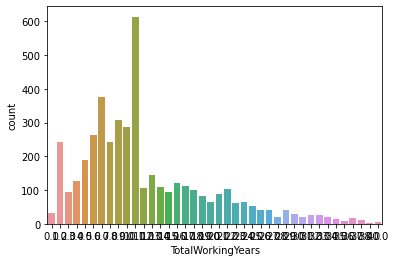

In [ ]:
sb.countplot(x='TotalWorkingYears',data=df)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
x_train.isnull().sum()

Age                                  0
DistanceFromHome                     0
Education                            0
EmployeeID                           0
Gender                               0
JobLevel                             0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
YearsAtCompany                       0
YearsSinceLastPromotion              0
YearsWithCurrManager                 0
JobInvolvement                       0
PerformanceRating                    0
EnvironmentSatisfaction              0
JobSatisfaction                      0
WorkLifeBalance                      0
mean_time                            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
EducationField_Life Sciences         0
EducationField_Marketing 

In [ ]:
y_pred = dtc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9555757026291931

Text(33.0, 0.5, 'Actual')

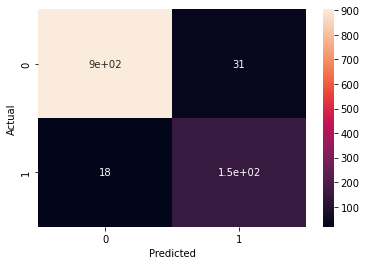

In [ ]:
sb.heatmap(confusion_matrix(y_test, y_pred),annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       935
           1       0.83      0.89      0.86       168

    accuracy                           0.96      1103
   macro avg       0.90      0.93      0.92      1103
weighted avg       0.96      0.96      0.96      1103



In [ ]:
precision_score(y_test, y_pred)

0.8287292817679558

In [ ]:
x_train

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
324,40,10,4,325,1,2,65670,1.0,13,1,8.0,3,8,3,7,4,3,3.0,2.0,3.0,6.297729,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
2404,49,2,4,2405,1,1,42270,4.0,18,0,17.0,3,2,2,2,2,3,4.0,1.0,2.0,9.581307,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4075,27,2,3,4076,0,1,39040,1.0,15,0,7.0,2,7,0,7,3,3,4.0,4.0,3.0,7.509178,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2098,30,9,3,2099,0,1,90710,0.0,19,1,12.0,2,11,5,7,2,3,4.0,2.0,3.0,8.824550,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2706,34,15,2,2707,0,2,84630,2.0,13,0,8.0,2,4,1,3,1,3,2.0,1.0,3.0,7.661160,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,26,2,3,3445,1,2,48210,6.0,14,2,6.0,2,3,1,2,3,3,1.0,1.0,3.0,7.874304,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
466,24,28,3,467,0,1,118490,1.0,16,1,5.0,3,4,3,2,3,3,4.0,3.0,3.0,6.460940,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3092,30,25,3,3093,1,1,24060,2.0,20,1,11.0,5,5,0,2,3,4,3.0,4.0,3.0,7.168521,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3772,29,1,3,3773,0,1,23140,3.0,13,0,9.0,5,7,0,7,4,3,3.0,1.0,3.0,5.738058,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
y_train

324     0
2404    0
4075    0
2098    0
2706    1
       ..
3444    1
466     0
3092    0
3772    0
860     0
Name: Attrition, Length: 3307, dtype: int64

In [ ]:
x_test

,Age,DistanceFromHome,Education,EmployeeID,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,mean_time,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1413,49,23,1,1414,0,2,92410,1.0,19,1,7.0,5,7,1,7,3,3,4.0,4.0,3.0,9.477831,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3352,27,1,3,3353,1,1,20580,1.0,14,1,1.0,5,1,0,0,3,3,2.0,3.0,3.0,7.276614,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3970,35,10,1,3971,0,2,43230,2.0,18,3,15.0,3,7,1,7,3,3,2.0,4.0,3.0,6.550413,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3629,52,3,2,3630,1,3,25790,9.0,19,1,10.0,1,8,7,7,3,3,2.0,2.0,2.0,9.400334,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
144,30,5,4,145,0,2,54100,0.0,17,1,6.0,2,5,4,4,3,3,2.0,3.0,3.0,7.464111,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602,43,10,2,1603,0,1,46170,1.0,11,0,25.0,2,25,3,9,3,3,1.0,2.0,3.0,6.736420,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1370,40,11,2,1371,1,4,52950,7.0,18,0,15.0,4,12,2,11,3,3,3.0,4.0,2.0,5.673376,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
2714,30,1,4,2715,0,1,53010,1.0,16,1,10.0,3,10,1,8,3,3,4.0,3.0,3.0,5.925844,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3933,30,7,3,3934,1,3,23130,2.0,11,0,12.0,5,7,1,7,3,3,3.0,1.0,3.0,7.456359,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_test

1413    0
3352    0
3970    0
3629    1
144     0
       ..
1602    0
1370    0
2714    0
3933    0
1407    0
Name: Attrition, Length: 1103, dtype: int64

In [ ]:
df['Attrition'].value_counts()

0    3699
1     711
Name: Attrition, dtype: int64